In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)    
        self.fc3 = nn.Linear(128, 10)     
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)    

    def forward(self, x):
        x = x.view(-1, 28 * 28)           
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)                   
        return x

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))    # Normalize pixels to [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)                  
        loss = criterion(output, target)      
        loss.backward()                       
        optimizer.step()                      

        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/10, Loss: 0.3958
Epoch 2/10, Loss: 0.1977
Epoch 3/10, Loss: 0.1661
Epoch 4/10, Loss: 0.1414
Epoch 5/10, Loss: 0.1266
Epoch 6/10, Loss: 0.1203
Epoch 7/10, Loss: 0.1127
Epoch 8/10, Loss: 0.1033
Epoch 9/10, Loss: 0.1003
Epoch 10/10, Loss: 0.0951


In [7]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)   # Get predicted class
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f"\nFinal Test Accuracy: {accuracy:.2f}%")


Final Test Accuracy: 97.48%


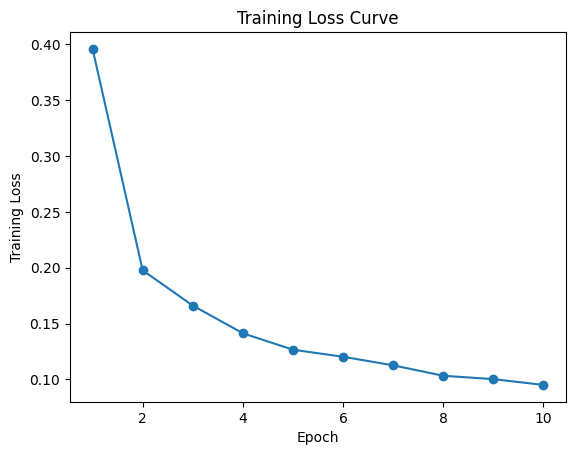

In [8]:
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.show()